# BOOTCAMP - PYTHON 1ª EDIÇÃO

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

import folium

In [2]:
abnb = pd.read_csv('AB_NYC_2019.csv')
abnb['price'] = abnb['price'].astype(float)
abnb['last_review'] = pd.to_datetime(abnb['last_review'])
abnb['minimun_rent'] = abnb['price'] * abnb['minimum_nights']


abnb['color'] = ''

abnb.loc[abnb['neighbourhood_group'] == 'Bronx', 'color'] = 'darkgreen'
abnb.loc[abnb['neighbourhood_group'] == 'Manhattan', 'color'] = 'darkred'
abnb.loc[abnb['neighbourhood_group'] == 'Queens', 'color'] = 'purple'
abnb.loc[abnb['neighbourhood_group'] == 'Staten Island', 'color'] = 'beige'
abnb.loc[abnb['neighbourhood_group'] == 'Brooklyn', 'color'] = 'cadetblue'

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                    float64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
minimun_rent                             float64
dtype: object

In [3]:
abnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,minimun_rent
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.21,6,365,149.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355,225.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,NaT,NaN,1,365,450.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05,4.64,1,194,89.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,0,800.0


# Perguntas de Negócio

## 1.  Qual o valor médio do aluguel na cidade de Nova York?

In [4]:
print(f"O valor médio do aluguel na cidade de NY é: ${np.round(abnb['price'].mean(), 2)}")

O valor médio do aluguel na cidade de NY é: $152.72


## 2.  Quais os nomes das regiões que existem na cidade de Nova York?

In [5]:
# abnb_neighbourhood = abnb[['neighbourhood_group', 'neighbourhood']].groupby(['neighbourhood_group', 'neighbourhood']).min()
# abnb_neighbourhood.reset_index(inplace=True)
# abnb_neighbourhood

# for group in abnb_neighbourhood['neighbourhood_group'].unique():
#     print(group)
#     print(abnb_neighbourhood.loc[abnb_neighbourhood['neighbourhood_group'] == group, 'neighbourhood'])

neighbourhood = sorted(abnb['neighbourhood_group'].unique().tolist())

print(f"As regiões de NY são: {neighbourhood[0]}, {neighbourhood[1]}, {neighbourhood[2]}, {neighbourhood[3]} e {neighbourhood[4]}")

As regiões de NY são: Bronx, Brooklyn, Manhattan, Queens e Staten Island


## 3.  Qual o valor do aluguel diário mais caro da cidade de Nova York?

In [59]:
print(f"O diária mais cara na cidade de NY é ${abnb['price'].max()}")

O diária mais cara na cidade de NY é $10000.0


## 4.  Quais são as categorias de imóveis que estão cadastradas dentro da base de dados da cidade de Nova York?

In [7]:
abnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

## 5.  Como é a variação dos preços ( desvio padrão ) dos imóveis em NY?

In [60]:
price_std = np.round(abnb['price'].std(), 2)
price_mean = np.round(abnb['price'].mean(), 2)

print(f' A variação dos preços das diárias em NY é U${price_std}, o que indica uma grande variação, já que o valor médio é U${price_mean}')

 A variação dos preços das diárias em NY é U$240.15, o que indica uma grande variação, já que o valor médio é U$152.72


## 6.  Quantos imóveis com preço acima da média e quantos abaixo da média?

In [9]:
qt_abaixo_media = len(abnb[abnb['price'] < abnb['price'].mean()])

qt_acima_media = len(abnb[abnb['price'] > abnb['price'].mean()])

print(f'Existem {qt_acima_media} imóveis com preço de aluguel diário acima da média da cidade de NY e {qt_abaixo_media} imóveis com o valor abaixo da média.')

Existem 14879 imóveis com preço de aluguel diário acima da média da cidade de NY e 34016 imóveis com o valor abaixo da média.


## 7.  Qual a distribuição do número de Reviews? Existem mais imóveis com muitos ou mais imóveis com poucas reviews?

<Axes: xlabel='number_of_reviews', ylabel='Count'>

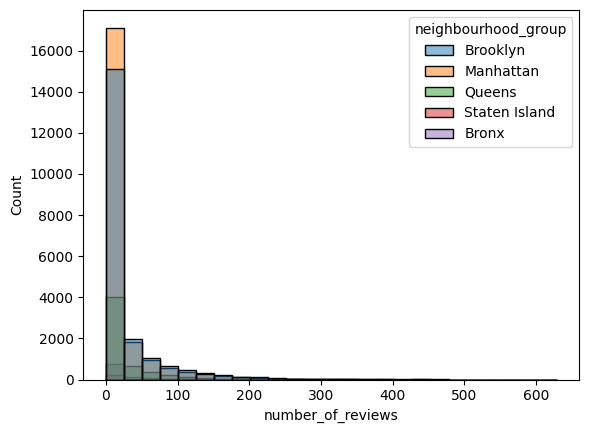

In [10]:
# sns.histplot(data = abnb['number_of_reviews'], hue = abnb['neighbourhood_group'], bins=25)

sns.color_palette("flare", as_cmap=True)

sns.histplot(data = abnb, x = 'number_of_reviews', hue = 'neighbourhood_group', bins=25)


In [19]:
fig = px.histogram(abnb, 
                    x="number_of_reviews",
                    color="neighbourhood_group",
                    nbins=25,
                    title='Number of reviews by neighbourhood group',
                    template='plotly_dark'
                    )

fig.show()

## 8.  Qual a data mais antiga da última avaliação feita?

In [ ]:
print(f"A data mais antiga da última avaliação é: {abnb['last_review'].min()}")
abnb[abnb['last_review'] == abnb['last_review'].min()]


A data mais antiga da última avaliação é: 2011-03-28 00:00:00


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,minimun_rent
317,74860,"Sunlit and Cozy Williamsburg/Greenpoint, Brooklyn",394752,Allison,Brooklyn,Greenpoint,40.72488,-73.95018,Private room,55.0,2,1,2011-03-28,0.01,1,0,110.0


## 9.  Qual é o valor do aluguel (diária) mais caro de cada região da base de dados da cidade de Nova York?

In [ ]:
abnb[['neighbourhood_group', 'price']].groupby('neighbourhood_group').max().reset_index().sort_values('price')

,neighbourhood_group,price
0,Bronx,2500.0
4,Staten Island,5000.0
1,Brooklyn,10000.0
2,Manhattan,10000.0
3,Queens,10000.0


## 10.  Qual o valor médio do Tempo (dias) em que o anúncio está disponível na plataforma?

In [ ]:
abnb['availability_365'].mean()

112.78132733408324

## 11.  Desenhe o histograma do Tempo (dias) em que o anúncio está disponível na plataforma.

<Axes: xlabel='availability_365', ylabel='Count'>

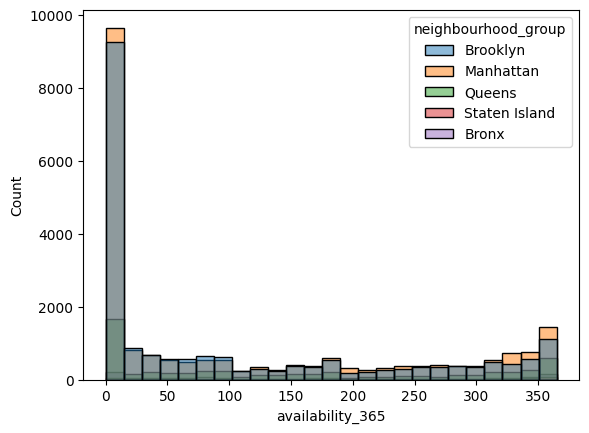

In [ ]:
sns.histplot(data = abnb, x = 'availability_365', hue = 'neighbourhood_group', bins=25)

## 12.  Desenho um histograma das Diárias Mínimas para Locação.

<Axes: xlabel='minimum_nights', ylabel='Count'>

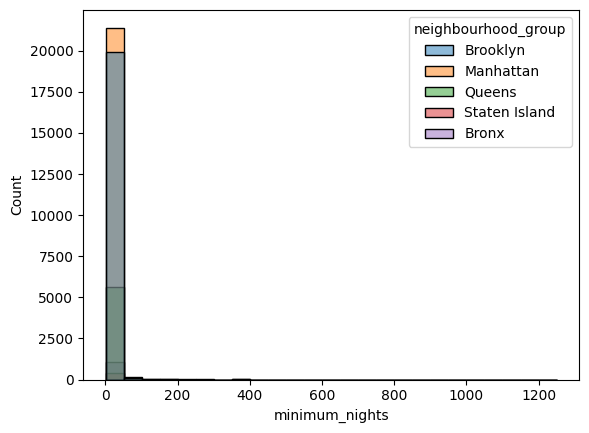

In [21]:
sns.histplot(data = abnb, x = 'minimum_nights', hue = 'neighbourhood_group', bins=25)

## 13.  Desenhe o histograma da Quantidade de Anúncios do Host do Imóvel.

<Axes: xlabel='calculated_host_listings_count', ylabel='Count'>

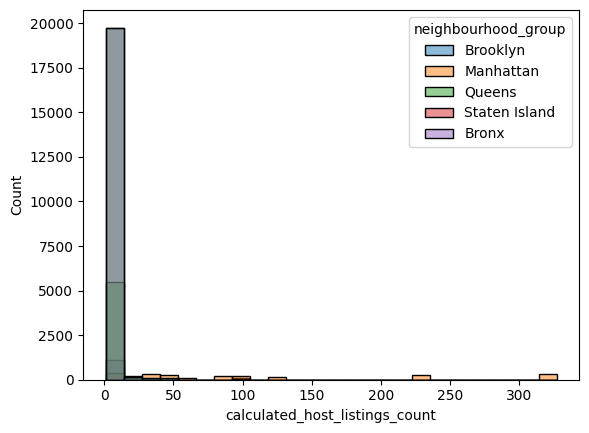

In [22]:
##  Desenhe o histograma da Quantidade de Anúncios do Host do Airbnb
# sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)

sns.histplot(data = abnb, x = 'calculated_host_listings_count', hue = 'neighbourhood_group', bins=25)
# sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)


In [ ]:
abnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,minimun_rent
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.21,6,365,149.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355,225.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,NaT,NaN,1,365,450.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05,4.64,1,194,89.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,0,800.0


## 14.  Desenhe um mapa da cidade de Nova York, localizando somente os top 10 imóveis com mais avaliações, por região.

In [62]:
cols = ['id', 'neighbourhood_group', 'latitude', 'longitude', 'number_of_reviews', 'color']

region_top10_review = abnb.loc[:, cols].sort_values('number_of_reviews', ascending=False).groupby('neighbourhood_group').head(10).reset_index(drop=True)

region_top10_review = region_top10_review.sort_values(['neighbourhood_group', 'number_of_reviews'], ascending=[True, False]).reset_index(drop=True)

In [65]:
map = folium.Map(location = [40.712776, -74.005974], zoom_start=11)

for i, c in region_top10_review.iterrows():
    folium.Marker(  [c['latitude'], c['longitude']],
                    popup=c['neighbourhood_group'],
                    icon=folium.Icon(color = c['color'])).add_to(map)
map

## 15.  Desenhe um mapa da cidade de Nova York, localizando somente os top 50 maiores preços.

In [ ]:
cols = ['neighbourhood_group', 'latitude', 'longitude', 'price']

top50_high_price = abnb.loc[:, cols].sort_values('price', ascending=False).head(50).reset_index(drop=True)
top50_high_price = top50_high_price.sort_values('price', ascending=False)

map = folium.Map(location = [40.712776, -74.005974], zoom_start=11)

for i, c in top50_high_price.iterrows():
    folium.Marker(  [c['latitude'], c['longitude']],
                    popup=c['price']).add_to(map)

map

## 16.  Desenhe um mapa da cidade de Nova York, localizando somente os top 10 menores preços, por região.

In [58]:
cols = ['id', 'neighbourhood_group', 'latitude', 'longitude', 'price', 'color']

region_bottom10_price = abnb.loc[abnb['price'] > 0, cols].sort_values(['neighbourhood_group', 'price'], ascending = True).groupby('neighbourhood_group').head(10).reset_index(drop=True)
region_bottom10_price

map = folium.Map(location = [40.712776, -74.005974], zoom_start=11)

for i, c in region_bottom10_price.iterrows():
    folium.Marker(  [c['latitude'], c['longitude']],
                    popup=c['neighbourhood_group'],
                    icon=folium.Icon(color = c['color'])).add_to(map)

map

In [ ]:
color argument of Icon should be one of: {'darkred', 'white', 'lightblue', 'orange', 'lightgray', 'beige', 'darkpurple', 'darkgreen', 'pink', 'lightgreen', 'lightred', 'cadetblue', 'red', 'black', 'gray', 'blue', 'green', 'purple', 'darkblue'}.


## 17.  Desenhe um gráfico de barras, mostrando a média de aluguel diária de cada região.

In [72]:
mean_price_data = round(abnb[['neighbourhood_group', 'price']].groupby(['neighbourhood_group']).mean(),2).sort_values('price', ascending=False).reset_index()

px.bar(mean_price_data, x = 'neighbourhood_group', y = 'price', text_auto=True, title = 'Valor médio das diárias nas regiões de NY - Em USD')

## 18.  Desenhe um gráfico de barras, mostrando a mediana de aluguel diária de cada região.

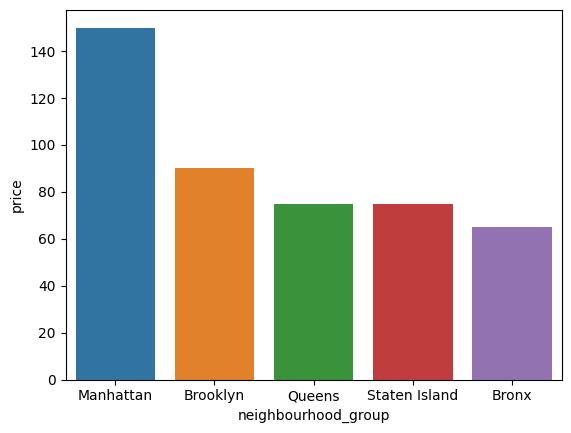

In [ ]:
median_price_data = abnb[['neighbourhood_group', 'price']].groupby('neighbourhood_group').median().sort_values('price', ascending=False).reset_index()

sns.barplot(data = median_price_data, x = 'neighbourhood_group', y = 'price');

## 19.  Desenhe um gráfico de barras, mostrando a soma de todos os valores da diária de cada região.

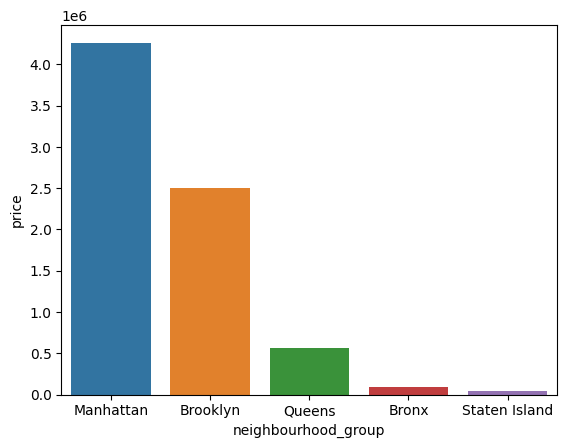

In [ ]:
total_price_data = abnb[['neighbourhood_group', 'price']].groupby('neighbourhood_group').sum().sort_values('price', ascending=False).reset_index()

sns.barplot(data = total_price_data, x = 'neighbourhood_group', y = 'price');

## 20.  Desenhe um gráfico de barras, mostrando o menor valor de diária de cada região.

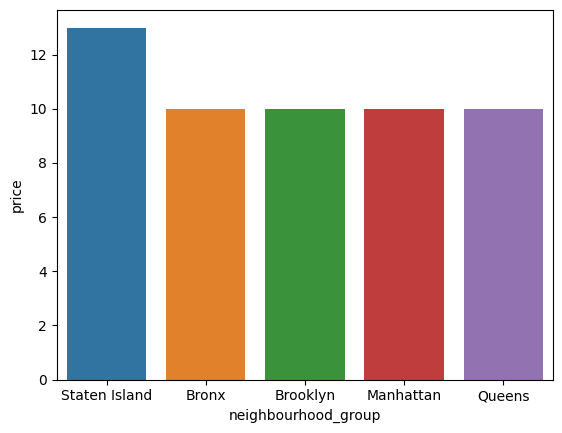

In [ ]:
min_price_data = abnb.loc[abnb['price'] > 0, ['neighbourhood_group', 'price']].groupby('neighbourhood_group').min().sort_values('price', ascending=False).reset_index()

sns.barplot(data = min_price_data, x = 'neighbourhood_group', y = 'price');

In [28]:
available_true = abnb[abnb['availability_365'] > 0]
data_plot = available_true[['neighbourhood_group', 'price']].groupby('neighbourhood_group').max().reset_index()

px.bar(data_plot, x='neighbourhood_group', y='price', title= 'Max rent price per region', text_auto=True)